In [11]:
# Perceptron

modality = Perceptron(penalty=None)
modality.fit(X_train, y_train)
logit = modality.score(X_test, y_test)
print(logit)

0.6459627329192547


/home/jupyter-scottn67/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.linear_model import SGDClassifier
#Stochastic Gradient Descent

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
print(sgd_clf.score(X_test, y_test))

0.6335403726708074


/home/jupyter-scottn67/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# Cross Validation

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
#diabetes = datasets.load_diabetes()

lasso = linear_model.Lasso()

print(cross_val_score(lasso, X, y, cv=5))


[0.30320564 0.26318574 0.26048957 0.12457104 0.20298047]


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/home/jupyter-scottn67/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter-scottn67/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter-scottn67/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.648, 0.648, 0.64 ])

In [19]:
from sklearn.cluster import MeanShift

means = MeanShift()
means.fit(X)

centroids = means.cluster_centers_ # coordinates of center of clusters
labels = means.labels_ # Label of each point, returns an array of 

#print(centroids)
#print(labels)

#print("X: ", X.shape)
#print(X)

#print("y: ", y.shape)
#print(y)

In [20]:
from sklearn.naive_bayes import CategoricalNB

bayes = CategoricalNB().fit(X_train, y_train)


#nbLogit = bayes.score(X_test, y_test, sample_weight=None)

#logit = cross_val_score(linear_model.Lasso(), X, y, cv=3)
#print(logit)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(375, 8)
(375, 1)
(161, 8)
(161, 1)


/home/jupyter-scottn67/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Problem 2. 
tripadvisor_review.csv contains some data from a travel reviews dataset, which was created by crawling the traveler’s review from TripAdvisor.com. Reviews on destinations across East Asia are considered in 10 different categories. Each traveler’s rating is categorized from 0(terrible) to 4(excellent), and we have access to average rating. Use the clustering method learned in class to find those with the most similar ratings.

Below, provide your code used to cluster the tripadvisor_review.csv data.

In [21]:
dat = pd.read_csv("tripadvisor_review.csv")
data = np.genfromtxt('tripadvisor_review.csv', skip_header=1, delimiter=',')

print(data.shape)

print(data[0])

(980, 11)
[ nan 0.93 1.8  2.29 0.62 0.8  2.42 3.19 2.79 1.82 2.42]


In [22]:
reviews = data[1:,1:]
print(reviews.shape)

(979, 10)


In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

#km = KMeans(n_clusters=5) #0-4
#km.fit(reviews)

#centroids = km.cluster_centers_
#labels = km.labels_
#print(centroids)
##print(labels)

In [24]:
# Mean Shift Clustering

ms = MeanShift()
ms.fit(reviews)

cluster_centers = ms.cluster_centers_ # coordinates of center of clusters
labels = ms.labels_ # Label of each point, returns an array of 

#print(ms_centroids)
#print(ms_labels)

In [25]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


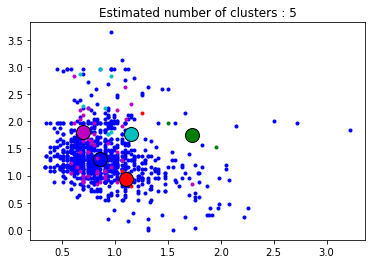

[0.7  1.8  3.62 1.37 1.46 1.62 3.19 2.75 1.12 3.42]


In [26]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure
plt.clf

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(reviews[my_members, 0], reviews[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    
plt.title("Estimated number of clusters : %d" % n_clusters_)
plt.show()
print(cluster_center)

Problem 3. You are tasked with collecting information about books. You are told that the following website has really good information:

http://books.toscrape.com/

You are tasked with accomplishing the following tasks:

1. Find the title of the most expensive book on the website.
2. For all of the "Travel" books, find their names and how many copies are in stock. Write them out as a list: [(Bookname, Stock), (Bookname, Stock)...]..
3. Find the name of the book which has a UPC of 7e9068872228c474

Provide your code used to find the following in cells below (Would recommend using multiple cells, maybe one for each problem)
In this cell, provide your solutions you've found.

Answers:
1.
2. 
3. 

In [1]:
import requests

from bs4 import BeautifulSoup

URL = "https://books.toscrape.com/"

page = requests.get(URL)

#print(page.text)

soup = BeautifulSoup(page.content, "html.parser")

results = soup.find(class_="col-sm-8 col-md-9")

books = results.find_all("li", class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")

#print(soup)
#print(results)

highestPrice = 0
expensiveTitle = ""

for book in books:
    title = book.find("img", alt=True)["alt"]
    price = book.find("p", class_ = "price_color").text
    price = str(price.replace("£", ""))
    #print(title, price)
    if (float(price) > float(highestPrice)):
        highestPrice = price
        expensiveTitle = title

print(highestPrice, expensiveTitle)
    

57.25 Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991


In [2]:
for i in range(49):
    if i == 0:
        continue
    URL = "https://books.toscrape.com/" + "catalogue/page-" +str(i+1) + ".html"
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(class_="col-sm-8 col-md-9")
    books = results.find_all("li", class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")
    highestPrice = 0
    expensiveTitle = ""

    for book in books:
        title = book.find("img", alt=True)["alt"]
        price = book.find("p", class_ = "price_color").text
        price = str(price.replace("£", ""))
        #print(title, price)
        if (float(price) > float(highestPrice)):
            highestPrice = price
            expensiveTitle = title
    finalHigh = 0
    finalTitle = ""
    if (float(highestPrice) > finalHigh):
        finalHigh = highestPrice
        finalTitle = expensiveTitle

print(finalHigh, finalTitle)

58.99 Listen to Me (Fusion #1)


In [29]:
# Write your code here

In [30]:
URL = "http://books.toscrape.com/catalogue/category/books/travel_2/index.html"

page = requests.get(URL)

#print(page.text)

soup = BeautifulSoup(page.content, "html.parser")



travelresults = soup.find(class_="col-sm-8 col-md-9")
#print(travelresults.text)
travelBooksResults = travelresults.find("ol", class_ = "row")

books = travelBooksResults.find_all("li", class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")


libres = []


for book in books:
    title = book.find("img", alt=True)["alt"]
    site = book.find("a", href=True)["href"]
    site = site.replace("../../../", "")
    
    #print(site)
    #print(title)
    
    #http://books.toscrape.com/catalogue/its-only-the-himalayas_981/index.html
    #http://books.toscrape.com/catalogue/category/books/travel_2/index.html
    
    bookURL = "http://books.toscrape.com/catalogue/" + str(site)
    
    #print(bookURL)
    bookPage = requests.get(bookURL)
    bookSoup = BeautifulSoup(bookPage.content, "html.parser")
    #print(title)
    #print(bookSoup.text)
    bookStock = bookSoup.find("p", class_="instock availability")
    stocks = bookStock.text[25:].split(" ")[0]
    dic[title] = stocks
    aye = (title, stocks)
    libres.append(aye)
    
print(libres)

NameError: name 'dic' is not defined